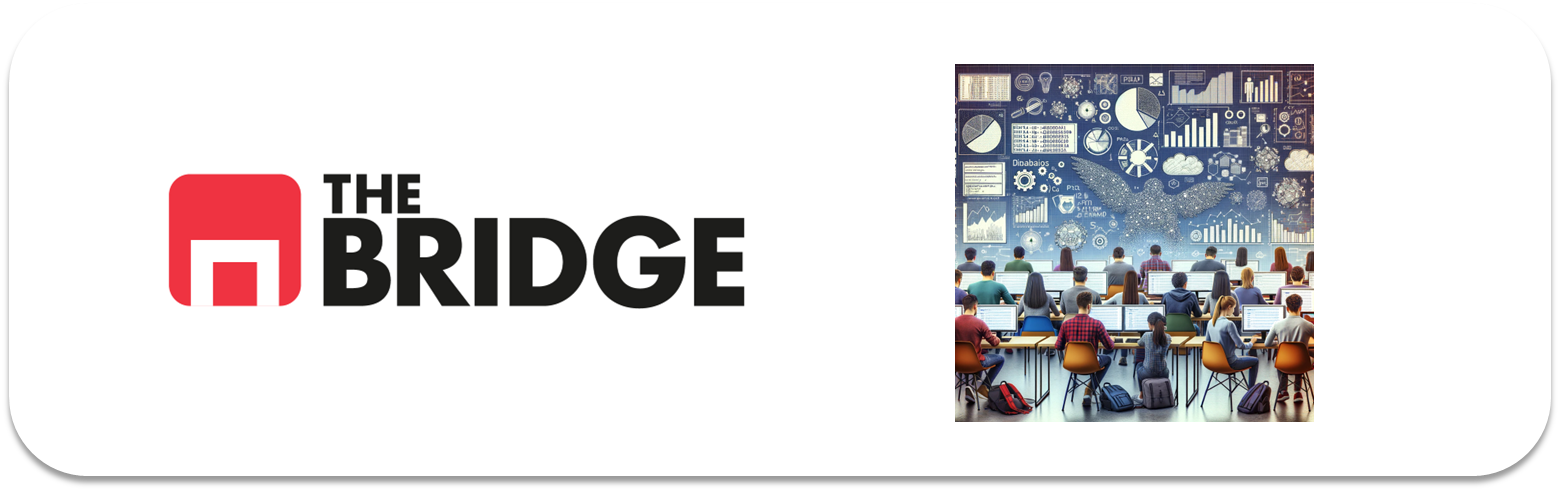

## TEAM CHALLENGE: TOOLBOX (II)

Este notebook describe la segunda parte del team challenge dedicado a construir un módulo de herramientas básicas para poder preparar la creación de modelos de Machine Learning de una forma más sencilla. 

En esta segunda parte, el grupo debe crear un conjunto de funciones que se describen a continuación y AÑADIRLAS al módulo en script "toolbox_ML.py" creado en la práctica de Toolbox anterior.

En esta ocasión además de crear las funciones, el ejemplo debe consistir en la resolución de un problema de ML supervisado empleando las funciones (en general para hacer el MiniEDA, la selección de features y la evaluación del modelo final).

### Entregables
Por lo tanto, **se pide:**  
**1. Entregar el script "toolbox_ML.py" que contenga el código comentado que implemente las funciones descritas y especificadas en el apartado [fuciones], además de las funciones ya implementadas en la práctica grupal anterior. La entrega se hará en el repositorio del grupo.**  
**2. Hacer una descripción del código creado en una breve presentación de 20 minutos, empleando para ello un ejemplo diseñado por el grupo. El ejemplo debe resolver un problema de ML, es decir crear un modelo de predicción sobre un dataset supervisado en el que se empleen AL MENOS las fuciones creadas en esta práctica. Se valorará que también emplee las funciones creadas en la práctica Toolbox (I), anterior**  
**3. Entregar el código del ejemplo (esto debería ser un notebook, pero puede ser también un script) también en el repositorio del grupo**  

### Plazos
Tendremos 2 sesiones de team challenge para crear el código (incluyendo la sesión de presentación de la práctica) y una sesión de presentación a partir de la presentación de esta parte.



### Funciones

El objetivo de las funciones que se especifican a continuación es ayudar a realizar el análisis y selección de features de la forma más flexible y rápida posible, dado un problema de Machine Learning concreto.

**Todas las funciones deben llevar comentado el código y deben incluir un docstring especificando su uso**, según la siguiente guía:

Un "docstring" en Python es una cadena de texto utilizada para documentar módulos, clases, métodos y funciones. El propósito de un docstring es explicar brevemente qué hace la función y cómo se debe utilizar. Los docstrings se encierran entre tres comillas dobles (""") al inicio y al final, y se colocan justo después de la definición de la función. Aquí hay un formato típico de un docstring para una función en Python:

```python
def mi_funcion(param1, param2):
    """
    Descripción breve de lo que hace la función.

    Argumentos:
    param1 (tipo): Descripción de param1.
    param2 (tipo): Descripción de param2.

    Retorna:
    tipo: Descripción de lo que retorna la función.
    """
    
    # El cuerpo de la función va aquí
    pass
```

En este formato:

1. **Primera línea**: Breve descripción de la función.
2. **Sección de Argumentos**: Lista cada parámetro, su tipo esperado y una breve descripción de su propósito.
3. **Sección de Retorna**: Describe el tipo y el propósito del valor que la función retorna.



In [33]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
from math import ceil

# Preprocesado y modelado
# ==============================================================================
from sklearn.model_selection import train_test_split
from scipy.stats import f_oneway
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,
    accuracy_score, precision_score, recall_score, classification_report, 
    confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.feature_selection import SelectKBest, f_classif, SelectFromModel, RFE, mutual_info_classif
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.preprocessing import StandardScaler

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Carga de datos
# ==============================================================================
titanic = pd.read_csv('titanic.csv')
df_wine = pd.read_csv('WineQT.csv')
df_iris = pd.read_csv('iris.csv')

In [2]:
df_iris

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target iris_class  
0       0.0     setosa  
1       0.0     setosa  
2       0.0     setosa  
3       0.0     setosa  
4       0.0     setosa  
..      ...        ...  
145     2.0  virginica  
146     2.0  virginica  
147     2.0  virginica  
148     2.0  virginica  
149     2.0  virginica  

[150 rows x 6 columns]

In [118]:
df_iris = df_iris.drop('iris_class', axis = 1)

In [119]:
target_iris = 'target'

# Convertir la columna objetivo a categórica
df_iris[target_iris] = df_iris[target_iris].astype('category')

In [4]:
df_wine

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               NaN             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1138                 29.0                  40.0  0.99574  3.42       0.75   
1139                 28.0                  38.0  0.99651  3.42       0.82   
1140                 32.0                  44.0  0.99490  3.45       0.58   
1141                 39.0                  51.0  0.99512  3.52       0.76   
1142                 32.0                  44.0  0.99547  3.57       0.71   

      alcohol  quality    Id  
0         9.4        5     0  
1         9.8        5     1  
2         9.8        5     2  
3         9.8        6     3  
4         9.4        5     4  
...       ...      ...   ...  
1138     11.0        6  1592  
1139      9.5        6  1593  
1140     10.5        5  1594  
1141     11.2        6  1595  
1142     10.2        5  1597  

[1143 rows x 13 columns]

In [75]:
target_wine = 'quality'
df_wine[target_wine] = df_wine[target_wine].astype('category')

In [95]:
df_wine.dropna(inplace=True)

In [96]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1142 entries, 1 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         1142 non-null   float64 
 1   volatile acidity      1142 non-null   float64 
 2   citric acid           1142 non-null   float64 
 3   residual sugar        1142 non-null   float64 
 4   chlorides             1142 non-null   float64 
 5   free sulfur dioxide   1142 non-null   float64 
 6   total sulfur dioxide  1142 non-null   float64 
 7   density               1142 non-null   float64 
 8   pH                    1142 non-null   float64 
 9   sulphates             1142 non-null   float64 
 10  alcohol               1142 non-null   float64 
 11  quality               1142 non-null   category
 12  Id                    1142 non-null   int64   
dtypes: category(1), float64(11), int64(1)
memory usage: 117.3 KB


In [6]:
titanic

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
4      man        True  NaN  Southampton    no   True  
..     ...         ...  ...          ...   ...    ...  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  

[891 rows x 15 columns]

In [34]:
target_titanic = 'survived'
titanic[target_titanic] = titanic[target_titanic].astype('category')

In [36]:
categorical_cols = ['pclass', 'sex', 'embarked']
for col in categorical_cols:
    titanic[col] = titanic[col].astype('category')

In [37]:
titanic.dropna(inplace=True)

In [38]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 1 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     182 non-null    category
 1   pclass       182 non-null    category
 2   sex          182 non-null    category
 3   age          182 non-null    float64 
 4   sibsp        182 non-null    int64   
 5   parch        182 non-null    int64   
 6   fare         182 non-null    float64 
 7   embarked     182 non-null    category
 8   class        182 non-null    object  
 9   who          182 non-null    object  
 10  adult_male   182 non-null    bool    
 11  deck         182 non-null    object  
 12  embark_town  182 non-null    object  
 13  alive        182 non-null    object  
 14  alone        182 non-null    bool    
dtypes: bool(2), category(4), float64(2), int64(2), object(5)
memory usage: 15.8+ KB


### Funcion: eval_model

Esta función debe recibir un target, unas predicciones para ese target, un argumento que determine si el problema es de regresión o clasificación y una lista de métricas:
* Si el argumento dice que el problema es de regresión, la lista de métricas debe admitir las siguientes etiquetas RMSE, MAE, MAPE, GRAPH.
* Si el argumento dice que el problema es de clasificación, la lista de métrica debe admitir, ACCURACY, PRECISION, RECALL, CLASS_REPORT, MATRIX, MATRIX_RECALL, MATRIX_PRED, PRECISION_X, RECALL_X. En el caso de las _X, X debe ser una etiqueta de alguna de las clases admitidas en el target.

Funcionamiento:
* Para cada etiqueta en la lista de métricas:
- RMSE, debe printar por pantalla y devolver el RMSE de la predicción contra el target.
- MAE, debe pintar por pantalla y devolver el MAE de la predicción contra el target. 
- MAPE, debe pintar por pantalla y devolver el MAPE de la predcción contra el target. Si el MAPE no se pudiera calcular la función debe avisar lanzando un error con un mensaje aclaratorio
- GRAPH, la función debe pintar una gráfica comparativa (scatter plot) del target con la predicción
- ACCURACY, pintará el accuracy del modelo contra target y lo retornará.
- PRECISION, pintará la precision media contra target y la retornará.
- RECALL, pintará la recall media contra target y la retornará.
- CLASS_REPORT, mostrará el classification report por pantalla.
- MATRIX, mostrará la matriz de confusión con los valores absolutos por casilla.
- MATRIX_RECALL, mostrará la matriz de confusión con los valores normalizados según el recall de cada fila (si usas ConfussionMatrixDisplay esto se consigue con normalize = "true")
- MATRIX_PRED, mostrará la matriz de confusión con los valores normalizados según las predicciones por columna (si usas ConfussionMatrixDisplay esto se consigue con normalize = "pred")
- PRECISION_X, mostrará la precisión para la clase etiquetada con el valor que sustituya a X (ej. PRECISION_0, mostrará la precisión de la clase 0)
- RECALL_X, mostrará el recall para la clase etiquetada co nel valor que sustituya a X (ej. RECALL_red, mostrará el recall de la clase etiquetada como "red")

NOTA1: Como puede que la función devuelva varias métricas, debe hacerlo en una tupla en el orden de aparición de la métrica en la lista que se le pasa como argumento. Ejemplo si la lista de entrada es ["GRAPH","RMSE","MAE"], la fución pintará la comparativa, imprimirá el RMSE y el MAE (da igual que lo haga antes de dibujar la gráfica) y devolverá una tupla con el (RMSE,MAE) por ese orden.
NOTA2: Una lista para clasificación puede contener varias PRECISION_X y RECALL_X, pej ["PRECISION_red","PRECISION_white","RECALL_red"] es una lista válida, tendrá que devolver la precisión de "red", la de "white" y el recall de "red". Si algunas de las etiquetas no existe debe arrojar ese error y detener el funcionamiento.

In [9]:
def eval_model(target, predictions, problem_type, metrics):
    """
    Evalúa un modelo de machine learning en función de las métricas especificadas.

    Argumentos:
    target (array-like): Valores reales del target.
    predictions (array-like): Valores predichos por el modelo.
    problem_type (str): Tipo de problema ('regression' o 'classification').
    metrics (list): Lista de métricas a calcular.

    Retorna:
    tuple: Tupla de métricas calculadas en el orden especificado.
    """
    results = []
    
    if problem_type == 'regression':
        for metric in metrics:
            if metric == 'RMSE':
                rmse = np.sqrt(mean_squared_error(target, predictions))
                print(f"RMSE: {rmse}")
                results.append(rmse)
            elif metric == 'MAE':
                mae = mean_absolute_error(target, predictions)
                print(f"MAE: {mae}")
                results.append(mae)
            elif metric == 'MAPE':
                try:
                    mape = mean_absolute_percentage_error(target, predictions)
                    print(f"MAPE: {mape}")
                    results.append(mape)
                except ValueError as e:
                    raise ValueError("MAPE no se puede calcular, asegúrese de que los valores del target no sean cero.") from e
            elif metric == 'GRAPH':
                plt.scatter(target, predictions)
                plt.xlabel("Actual")
                plt.ylabel("Predicted")
                plt.title("Actual vs Predicted")
                plt.show()
                
    elif problem_type == 'classification':
        for metric in metrics:
            if metric == 'ACCURACY':
                accuracy = accuracy_score(target, predictions)
                print(f"Accuracy: {accuracy}")
                results.append(accuracy)
            elif metric == 'PRECISION':
                precision = precision_score(target, predictions, average='macro')
                print(f"Precision: {precision}")
                results.append(precision)
            elif metric == 'RECALL':
                recall = recall_score(target, predictions, average='macro')
                print(f"Recall: {recall}")
                results.append(recall)
            elif metric == 'CLASS_REPORT':
                report = classification_report(target, predictions)
                print("Classification Report:\n", report)
            elif metric == 'MATRIX':
                cm = confusion_matrix(target, predictions)
                disp = ConfusionMatrixDisplay(confusion_matrix=cm)
                disp.plot()
                plt.show()
            elif metric == 'MATRIX_RECALL':
                cm = confusion_matrix(target, predictions, normalize='true')
                disp = ConfusionMatrixDisplay(confusion_matrix=cm)
                disp.plot()
                plt.show()
            elif metric == 'MATRIX_PRED':
                cm = confusion_matrix(target, predictions, normalize='pred')
                disp = ConfusionMatrixDisplay(confusion_matrix=cm)
                disp.plot()
                plt.show()
            elif metric.startswith('PRECISION_'):
                class_label = metric.split('_')[1]
                precision_class = precision_score(target, predictions, labels=[class_label], average='macro', zero_division=0)
                if precision_class == 0:
                    raise ValueError(f"Etiqueta '{class_label}' no existe en el target.")
                print(f"Precision for {class_label}: {precision_class}")
                results.append(precision_class)
            elif metric.startswith('RECALL_'):
                class_label = metric.split('_')[1]
                recall_class = recall_score(target, predictions, labels=[class_label], average='macro', zero_division=0)
                if recall_class == 0:
                    raise ValueError(f"Etiqueta '{class_label}' no existe en el target.")
                print(f"Recall for {class_label}: {recall_class}")
                results.append(recall_class)
    
    return tuple(results)

# Explicación del código:
# Importación de bibliotecas: Se importan las bibliotecas necesarias para el cálculo de métricas y la visualización de gráficos.
# Definición de la función eval_model: La función toma cuatro argumentos: target (valores reales), predictions (valores predichos), problem_type (tipo de problema: 'regression' o 'classification') y metrics (lista de métricas a calcular).
# Evaluación para problemas de regresión:
# Se itera sobre cada métrica en la lista de métricas.
# Para cada métrica, se calcula el valor correspondiente y se imprime. En el caso de GRAPH, se genera un scatter plot.
# Evaluación para problemas de clasificación:
# Similar al caso de regresión, pero con métricas específicas para clasificación.
# Se incluyen verificaciones adicionales para métricas específicas de clases (e.g., PRECISION_X y RECALL_X).
# Retorno de resultados: La función retorna una tupla con los valores de las métricas en el orden especificado en la lista de métricas.

Con el dataset de Iris:

In [120]:
X = df_iris.drop(columns=[target_iris])
y = df_iris[target_iris]

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [122]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [123]:
y_pred = model.predict(X_test)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



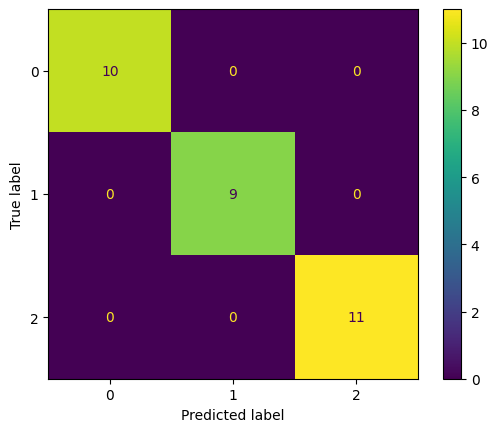

Resultados de evaluación: (1.0, 1.0, 1.0)


In [124]:
metrics = ['ACCURACY', 'PRECISION', 'RECALL', 'CLASS_REPORT', 'MATRIX']
results = eval_model(y_test, y_pred, problem_type='classification', metrics=metrics)
print("Resultados de evaluación:", results)

Con el dataset Wine:

In [97]:
X = df_wine.drop(columns=[target_wine])
y = df_wine[target_wine]

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [100]:
y_pred = model.predict(X_test)

Accuracy: 0.6550218340611353
Precision: 0.4721009505080302
Recall: 0.3672930153109181
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         7
           5       0.66      0.82      0.74        91
           6       0.69      0.61      0.65       102
           7       0.48      0.52      0.50        23
           8       1.00      0.25      0.40         4

    accuracy                           0.66       229
   macro avg       0.47      0.37      0.38       229
weighted avg       0.64      0.66      0.64       229



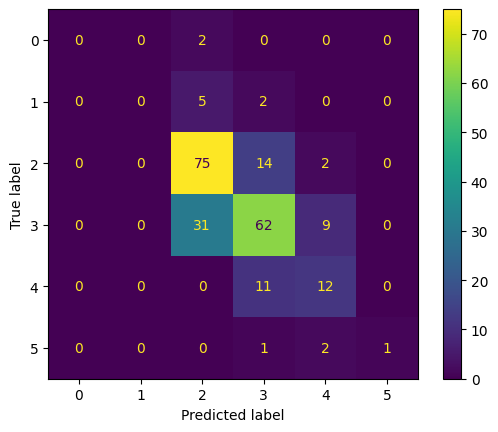

Resultados de evaluación: (0.6550218340611353, 0.4721009505080302, 0.3672930153109181)


In [101]:
metrics = ['ACCURACY', 'PRECISION', 'RECALL', 'CLASS_REPORT', 'MATRIX']
results = eval_model(y_test, y_pred, problem_type='classification', metrics=metrics)
print("Resultados de evaluación:", results)

Con el dataset de titanic:

In [39]:
X = titanic.drop(columns=['survived'])
y = titanic['survived']

In [40]:
X = pd.get_dummies(X, drop_first=True)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [43]:
predictions = model.predict(X_test)

Accuracy: 0.9636363636363636
Precision: 0.9714285714285714
Recall: 0.9545454545454546
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95        22
           1       0.94      1.00      0.97        33

    accuracy                           0.96        55
   macro avg       0.97      0.95      0.96        55
weighted avg       0.97      0.96      0.96        55



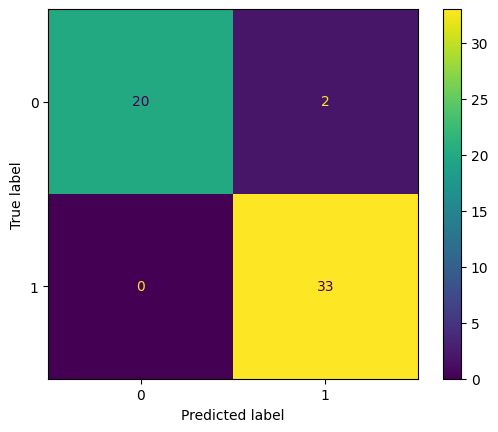

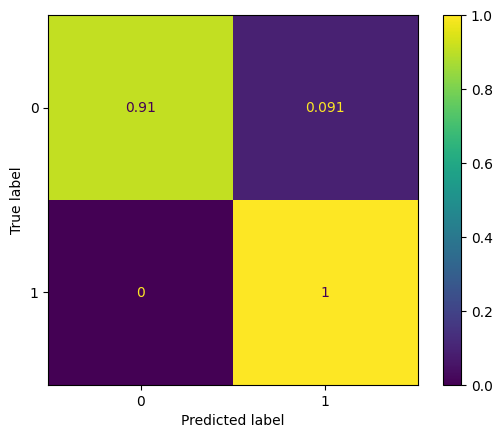

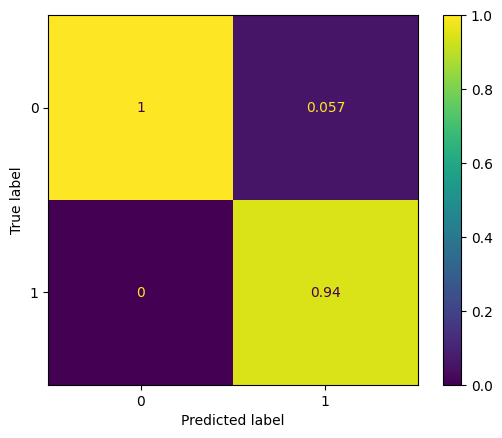

Resultados de evaluación: (0.9636363636363636, 0.9714285714285714, 0.9545454545454546)


In [44]:
metrics = ['ACCURACY', 'PRECISION', 'RECALL', 'CLASS_REPORT', 'MATRIX', 'MATRIX_RECALL', 'MATRIX_PRED']
eval_results = eval_model(y_test, predictions, problem_type='classification', metrics=metrics)
print("Resultados de evaluación:", eval_results)

### Funcion: get_features_num_classification

Esta función recibe como argumentos un dataframe, el nombre de una de las columnas del mismo (argumento 'target_col'), que debería ser el target de un hipotético modelo de clasificación, es decir debe ser una variable categórica o discreta pero con baja cardinalidad, además de un argumento float "pvalue" cuyo valor debe ser por defecto 0.05.

La función debe devolver una lista con las columnas numéricas del dataframe cuyo ANOVA con la columna designada por "target_col" supere el test de hipótesis con significación mayor o igual a 1-pvalue.

La función debe hacer todas las comprobaciones necesarias para no dar error como consecuecia de los valores de entrada. Es decir hará un check de los valores asignados a los argumentos de entrada y si estos no son adecuados debe retornar None y printar por pantalla la razón de este comportamiento. Ojo entre las comprobaciones debe estar que "target_col" hace referencia a una variable categórica del dataframe.

In [27]:
def get_features_num_classification(df, target_col, pvalue=0.05):
    """
    Selecciona columnas numéricas que tienen una relación significativa con la columna target
    utilizando ANOVA para problemas de clasificación.

    Argumentos:
    df (pd.DataFrame): DataFrame con los datos.
    target_col (str): Nombre de la columna objetivo (target) que debe ser categórica.
    pvalue (float): Valor de significancia para el test de ANOVA (por defecto 0.05).

    Retorna:
    list: Lista de columnas numéricas que pasan el test de ANOVA.
    """
    # Comprobación de que target_col existe en el dataframe
    if target_col not in df.columns:
        print(f"La columna '{target_col}' no existe en el DataFrame.")
        return None
    
    # Comprobación de que target_col es categórica
    if not pd.api.types.is_categorical_dtype(df[target_col]) and not pd.api.types.is_object_dtype(df[target_col]):
        print(f"La columna '{target_col}' no es categórica.")
        return None
    
    # Obtener columnas numéricas
    numeric_cols = df.select_dtypes(include='number').columns
    
    # Lista para almacenar las columnas que pasan el test de ANOVA
    significant_features = []
    
    # Realizar ANOVA para cada columna numérica
    for col in numeric_cols:
        groups = [df[col][df[target_col] == category].dropna() for category in df[target_col].unique()]
        
        # Verificar si todas las listas en groups son constantes
        if any(len(group) == 0 or group.nunique() <= 1 for group in groups):
            print(f"La columna '{col}' tiene grupos con valores constantes o vacíos y no se puede aplicar ANOVA.")
            continue
        
        try:
            # Realizar ANOVA
            f_val, p_val = f_oneway(*groups)
        except Exception as e:
            print(f"No se pudo realizar ANOVA para la columna '{col}': {e}")
            continue
        
        # Verificar si el p_valor es menor que 1 - pvalue
        if p_val < pvalue:
            significant_features.append(col)
    
    return significant_features

# Explicación del código:
# Importación de bibliotecas: Se importan pandas para la manipulación del DataFrame y f_oneway de scipy.stats para realizar el ANOVA.
# Definición de la función get_features_num_classification:
# Argumentos:
# df: DataFrame que contiene los datos.
# target_col: Columna del DataFrame que se utiliza como objetivo y debe ser categórica.
# pvalue: Valor de significancia para el test de ANOVA, con un valor predeterminado de 0.05.
# Comprobaciones iniciales:
# Verifica si target_col existe en el DataFrame.
# Verifica si target_col es una columna categórica.
# Obtención de columnas numéricas: Se seleccionan todas las columnas numéricas del DataFrame.
# Realización del ANOVA:
# Para cada columna numérica, se realiza un ANOVA agrupando los datos por las categorías de target_col.
# Si el valor p del ANOVA es mayor o igual a 1−pvalue, se considera significativa y se añade a la lista de significant_features.
# Retorno de resultados: La función retorna la lista de columnas numéricas que pasan el test de ANOVA.


Con iris:

In [111]:
num_features = get_features_num_classification(df_iris, target_iris)
print("Features numéricos significativos:", num_features)

Features numéricos significativos: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Con Wine:

In [102]:
num_features = get_features_num_classification(df_wine, target_wine)
print("Features numéricos significativos:", num_features)

Features numéricos significativos: ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'Id']


Con Titanic:

In [77]:
num_features = get_features_num_classification(titanic, target_titanic)
print("Features numéricos significativos:", num_features)

Features numéricos significativos: ['age']


### Funcion: plot_features_num_classification

Esta función recibe un dataframe, una argumento "target_col" con valor por defecto "", una lista de strings ("columns") cuyo valor por defecto es la lista vacía,  y un argumento ("pvalue") con valor 0.05 por defecto.

Si la lista no está vacía, la función pintará una pairplot del dataframe considerando la columna designada por "target_col" y aquellas incluidas en "column" que cumplan el test de ANOVA para el nivel 1-pvalue de significación estadística. La función devolverá los valores de "columns" que cumplan con las condiciones anteriores. Ojo, se espera que las columnas sean numéricas. El pairplot utilizar como argumento de hue el valor de target_col.

Si la lista está vacía, entonces la función igualará "columns" a las variables numéricas del dataframe y se comportará como se describe en el párrafo anterior.

EXTRA_1: Se valorará adicionalmente el hecho de que si el número de valores posibles de target_Col se superior a 5, se usen diferentes pairplot diferentes, en cuyo caso pintará un pairplot por cada 5 valores de target posibles.

EXTRA_2: Se valorará adicionalmente el hecho de que si la lista de columnas a pintar es grande se pinten varios pairplot con un máximo de cinco columnas en cada pairplot (siendo siempre una de ellas la indicada por "target_col")

De igual manera que en la función descrita anteriormente deberá hacer un check de los valores de entrada y comportarse como se describe en el último párrafo de la función `get_features_num_classification`

In [78]:
def plot_features_num_classification(df, target_col="", columns=[], pvalue=0.05):
    """
    Genera pairplots de características numéricas significativas con respecto a una columna objetivo categórica.

    Argumentos:
    df (pd.DataFrame): DataFrame con los datos.
    target_col (str): Nombre de la columna objetivo (target) que debe ser categórica o numérica discreta.
    columns (list): Lista de nombres de columnas numéricas a considerar (por defecto lista vacía).
    pvalue (float): Valor de significancia para el test de ANOVA (por defecto 0.05).

    Retorna:
    list: Lista de columnas que pasan el test de ANOVA.
    """
    if target_col not in df.columns:
        print(f"La columna '{target_col}' no existe en el DataFrame.")
        return None

    if not pd.api.types.is_categorical_dtype(df[target_col]) and not pd.api.types.is_integer_dtype(df[target_col]):
        print(f"La columna '{target_col}' no es categórica ni numérica discreta.")
        return None

    if not columns:
        columns = df.select_dtypes(include='number').columns.tolist()

    significant_features = get_features_num_classification(df, target_col, pvalue)
    if not significant_features:
        print("No hay columnas significativas para el nivel de significancia proporcionado.")
        return []

    # Añadir la columna objetivo a las columnas significativas para el pairplot
    significant_features.append(target_col)

    # Crear pairplot
    sns.pairplot(df[significant_features], hue=target_col)
    plt.show()

    return significant_features

# Explicación del código:
# Importación de bibliotecas: Se importan las bibliotecas necesarias para la manipulación del DataFrame, el test de ANOVA y la generación de gráficos.
# Definición de la función plot_features_num_classification:
# Argumentos:
# df: DataFrame que contiene los datos.
# target_col: Columna del DataFrame que se utiliza como objetivo y debe ser categórica.
# columns: Lista de columnas numéricas a considerar (por defecto lista vacía).
# pvalue: Valor de significancia para el test de ANOVA, con un valor predeterminado de 0.05.
# Comprobaciones iniciales:
# Verifica si target_col existe en el DataFrame.
# Verifica si target_col es una columna categórica.
# Si la lista de columnas está vacía, selecciona todas las columnas numéricas del DataFrame.
# Realización del ANOVA:
# Para cada columna numérica en columns, se realiza un ANOVA agrupando los datos por las categorías de target_col.
# Si el valor p del ANOVA es mayor o igual a 1−pvalue, se considera significativa y se añade a la lista de significant_features.
# Generación de pairplots:
# Si el número de valores únicos en target_col supera los 5, se divide en grupos de 5 y se generan pairplots por cada grupo.
# Si la lista de columnas a pintar es grande, se dividen en grupos de 5 columnas (incluyendo siempre target_col) y se generan pairplots por cada grupo.
# Retorno de resultados: La función retorna la lista de columnas numéricas que pasan el test de ANOVA.

Con wine:

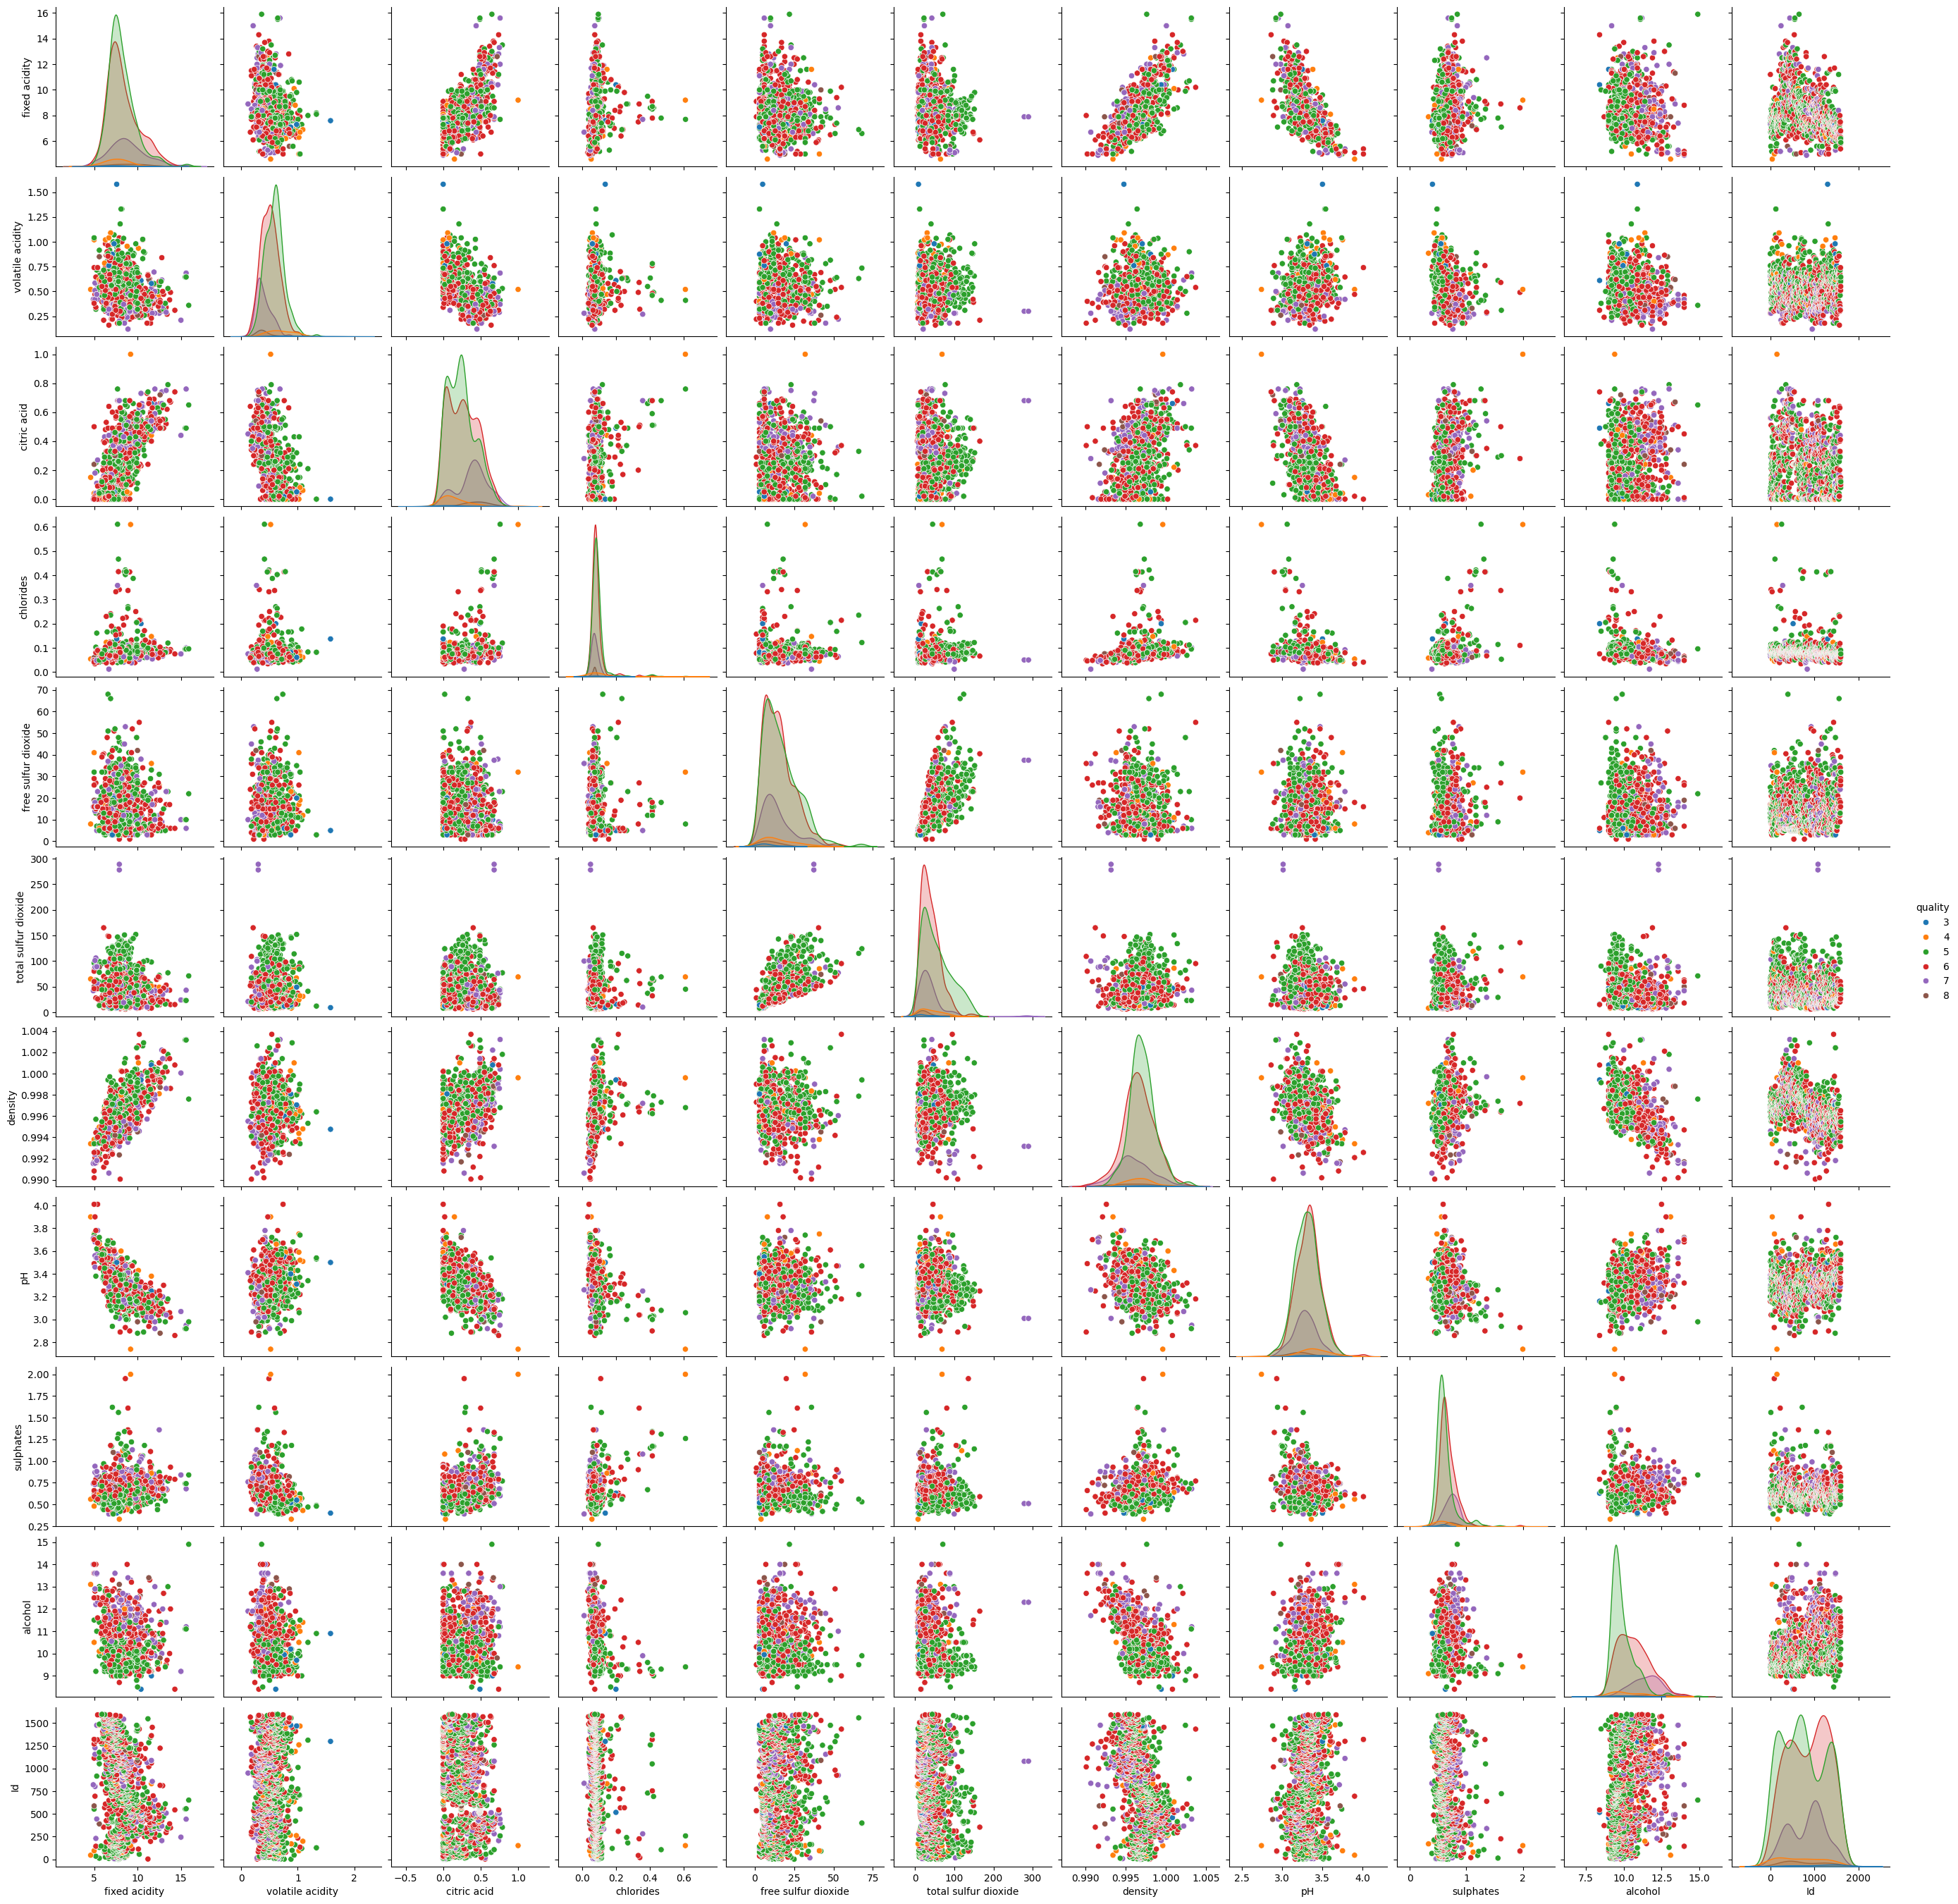

Features numéricos significativos para el plot: ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'Id', 'quality']


In [103]:
significant_num_features = plot_features_num_classification(df_wine, target_wine, pvalue=0.05)
print("Features numéricos significativos para el plot:", significant_num_features)

Con iris:

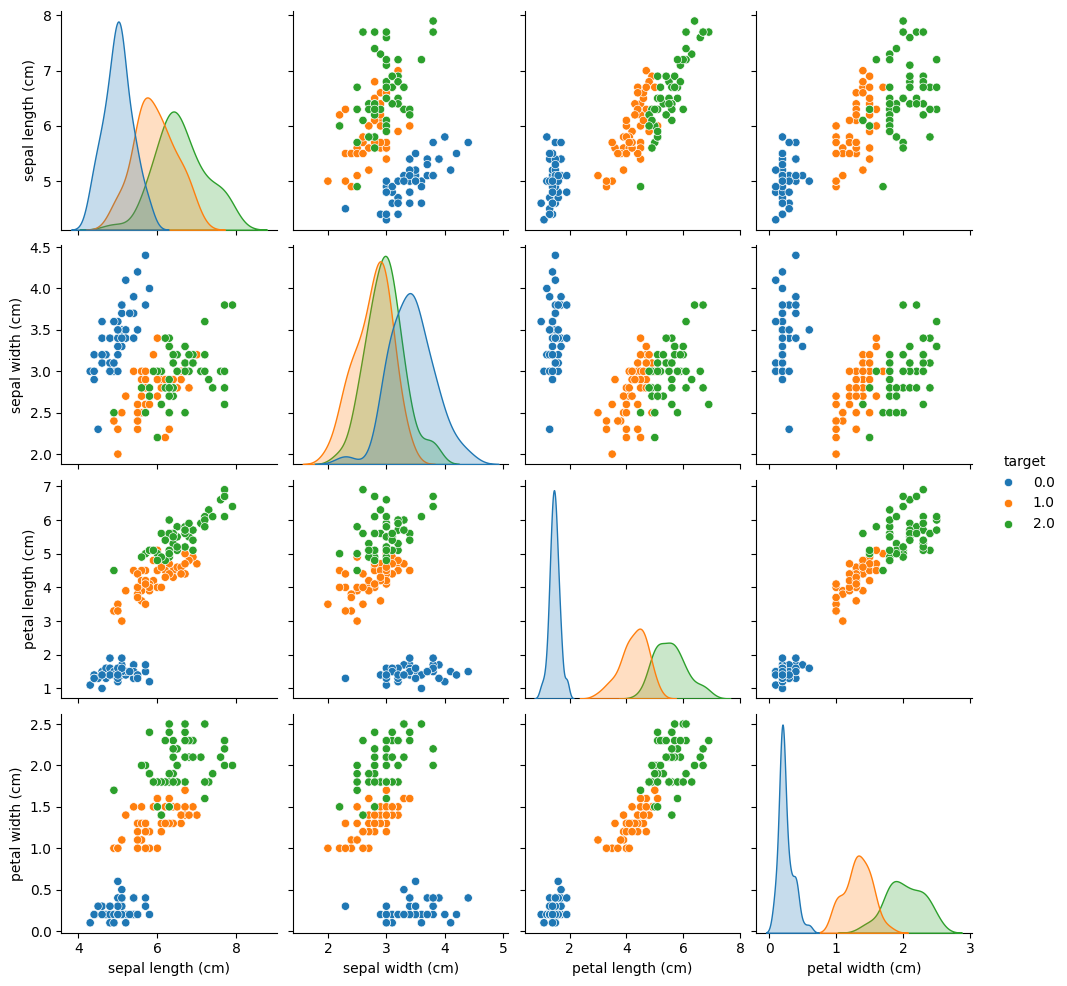

Features numéricos significativos para el plot: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target']


In [112]:
significant_num_features = plot_features_num_classification(df_iris, target_iris, pvalue=0.05)
print("Features numéricos significativos para el plot:", significant_num_features)

Con Titanic:

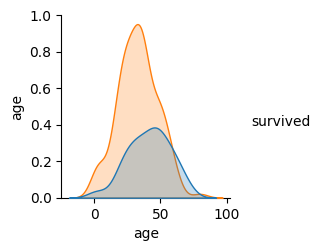

Features numéricos significativos para el plot: ['age', 'survived']


In [81]:
significant_num_features = plot_features_num_classification(titanic, target_titanic)
print("Features numéricos significativos para el plot:", significant_num_features)

### Funcion: get_features_cat_classification



Esta función recibe como argumentos un dataframe, el nombre de una de las columnas del mismo (argumento 'target_col'), que debería ser el target de un hipotético modelo de clasificación, es decir debe ser una variable categórica o numérica discreta pero con baja cardinalidad, un argumento "normalize" con valor False por defecto, una variable float "mi_threshold" cuyo valor por defecto será 0.

* En caso de que "normalize" sea False:
    La función debe devolver una lista con las columnas categóricas del dataframe cuyo valor de mutual information con 'target_col' iguale o supere el valor de "mi_threshold".

* En caso de que "normalize" sea True:
    La función debe devolver una lista con las columnas categóricas del dataframe cuyo valor normalizado de mutual information con 'target_col' iguale o supere el valor de "mi_threshold". El valor normalizado de mutual information se considera el obtenido de dividir el valor de mutual information tal cual ofrece sklearn o la fórmula de cálculo por la suma de todos los valores de mutual information de las features categóricas del dataframe.
    En este caso, la función debe comprobar que "mi_threshold" es un valor float entre 0 y 1, y arrojar un error si no lo es.

La función debe hacer todas las comprobaciones necesarias para no dar error como consecuecia de los valores de entrada. Es decir hará un check de los valores asignados a los argumentos de entrada y si estos no son adecuados debe retornar None y printar por pantalla la razón de este comportamiento. Ojo entre las comprobaciones debe estar que "target_col" hace referencia a una variable categórica del dataframe.

In [82]:
def get_features_cat_classification(df, target_col, normalize=False, mi_threshold=0):
    """
    Selecciona columnas categóricas que tienen una relación significativa con la columna target
    utilizando Mutual Information para problemas de clasificación.

    Argumentos:
    df (pd.DataFrame): DataFrame con los datos.
    target_col (str): Nombre de la columna objetivo (target) que debe ser categórica o numérica discreta.
    normalize (bool): Indica si se debe normalizar la información mutua (por defecto False).
    mi_threshold (float): Umbral de información mutua para seleccionar las características (por defecto 0).

    Retorna:
    list: Lista de columnas categóricas que cumplen con el umbral de información mutua.
    """
    # Comprobación de que target_col existe en el dataframe
    if target_col not in df.columns:
        print(f"La columna '{target_col}' no existe en el DataFrame.")
        return None

    # Comprobación de que target_col es categórica o numérica discreta
    if not isinstance(df[target_col].dtype, pd.CategoricalDtype) and not pd.api.types.is_integer_dtype(df[target_col]):
        print(f"La columna '{target_col}' no es categórica ni numérica discreta.")
        return None

    # Comprobación de que mi_threshold es un float y en el rango correcto si normalize es True
    if normalize and (not isinstance(mi_threshold, float) or mi_threshold < 0 or mi_threshold > 1):
        print(f"El umbral de información mutua '{mi_threshold}' debe ser un float entre 0 y 1 cuando normalize es True.")
        return None

    # Obtener columnas categóricas
    categorical_cols = df.select_dtypes(include=['category', 'object']).columns
    
    # Convertir columnas categóricas a códigos numéricos
    df_encoded = df[categorical_cols].apply(lambda x: x.astype('category').cat.codes)

    # Calcular Mutual Information
    mi = mutual_info_classif(df_encoded, df[target_col], discrete_features=True)

    # Normalizar si es necesario
    if normalize:
        total_mi = mi.sum()
        mi = mi / total_mi

    # Seleccionar columnas que cumplen con el umbral de información mutua
    selected_features = [col for col, value in zip(categorical_cols, mi) if value >= mi_threshold]

    return selected_features


# Explicación del código:
# Importación de bibliotecas: Se importan pandas para la manipulación del DataFrame y mutual_info_classif de sklearn.feature_selection para calcular la información mutua.
# Definición de la función get_features_cat_classification:
# Argumentos:
# df: DataFrame que contiene los datos.
# target_col: Columna del DataFrame que se utiliza como objetivo y debe ser categórica o numérica discreta.
# normalize: Indica si se debe normalizar la información mutua, con un valor predeterminado de False.
# mi_threshold: Umbral de información mutua para seleccionar las características, con un valor predeterminado de 0.
# Comprobaciones iniciales:
# Verifica si target_col existe en el DataFrame.
# Verifica si target_col es una columna categórica o numérica discreta.
# Si normalize es True, verifica que mi_threshold sea un float entre 0 y 1.
# Obtención de columnas categóricas: Se seleccionan todas las columnas categóricas del DataFrame.
# Cálculo de la información mutua: Se calcula la información mutua para las columnas categóricas con respecto a target_col.
# Normalización (si es necesario): Si normalize es True, se normaliza la información mutua dividiendo cada valor por la suma total de la información mutua.
# Selección de columnas: Se seleccionan las columnas que cumplen con el umbral de información mutua especificado.
# Retorno de resultados: La función retorna la lista de columnas categóricas que cumplen con el umbral de información mutua.

Con wine:

In [104]:
cat_features = get_features_cat_classification(df_wine, target_wine, normalize=True, mi_threshold=0.05)
print("Features categóricos significativos:", cat_features)

Features categóricos significativos: ['quality']


Con iris:

In [127]:
cat_features = get_features_cat_classification(df_iris, target_iris, normalize=True, mi_threshold=0.05)
print("Features categóricos significativos:", cat_features)

Features categóricos significativos: ['target']


Con Titanic:

In [85]:
cat_features = get_features_cat_classification(titanic, target_titanic, normalize=True, mi_threshold=0.05)
print("Features categóricos significativos:", cat_features)

Features categóricos significativos: ['survived', 'sex', 'who', 'alive']


### Funcion: plot_features_cat_classification

Esta función recibe un dataframe, una argumento "target_col" con valor por defecto "", una lista de strings ("columns") cuyo valor por defecto es la lista vacía, un argumento ("mi_threshold") con valor 0.0 por defecto, y un argumento "normalize" a False.

Si la lista no está vacía:
* La función seleccionara de esta lista los valores que correspondan a columnas o features categóricas del dataframe cuyo valor de mutual information respecto de target_col supere el umbral puesto en "mi_threshold" (con las mismas considereciones respecto a "normalize" que se comentan en la descripción de la función "get_features_cat_classification").
* Para los valores seleccionados, pintará la distribución de etiquetas de cada valor respecto a los valores de la columna "target_col".

Si la lista está vacía:
* Entonces la función igualará "columns" a las variables categóricas del dataframe y se comportará como se describe en la sección "Si la lista no está vacía"

De igual manera que en la función descrita anteriormente deberá hacer un check de los valores de entrada y comportarse como se describe en el último párrafo de la función `get_features_cat_classification`.

In [86]:
def plot_features_cat_classification(df, target_col="", columns=[], mi_threshold=0.0, normalize=False):
    """
    Genera subplots de características categóricas significativas con respecto a una columna objetivo categórica.

    Argumentos:
    df (pd.DataFrame): DataFrame con los datos.
    target_col (str): Nombre de la columna objetivo (target) que debe ser categórica o numérica discreta.
    columns (list): Lista de nombres de columnas categóricas a considerar (por defecto lista vacía).
    mi_threshold (float): Umbral de información mutua para seleccionar las características (por defecto 0.0).
    normalize (bool): Indica si se debe normalizar la información mutua (por defecto False).

    Retorna:
    list: Lista de columnas que pasan el umbral de información mutua.
    """
    # Comprobación de que target_col existe en el dataframe
    if target_col not in df.columns:
        print(f"La columna '{target_col}' no existe en el DataFrame.")
        return None

    # Comprobación de que target_col es categórica o numérica discreta
    if not isinstance(df[target_col].dtype, pd.CategoricalDtype) and not pd.api.types.is_integer_dtype(df[target_col]):
        print(f"La columna '{target_col}' no es categórica ni numérica discreta.")
        return None

    # Comprobación de que mi_threshold es un float y en el rango correcto si normalize es True
    if normalize and (not isinstance(mi_threshold, float) or mi_threshold < 0 or mi_threshold > 1):
        print(f"El umbral de información mutua '{mi_threshold}' debe ser un float entre 0 y 1 cuando normalize es True.")
        return None

    # Si la lista de columnas está vacía, obtener todas las columnas categóricas del dataframe
    if not columns:
        columns = df.select_dtypes(include=['category', 'object']).columns.tolist()

    # Filtrar columnas categóricas
    categorical_cols = [col for col in columns if col in df.columns and isinstance(df[col].dtype, pd.CategoricalDtype)]

    # Convertir columnas categóricas a códigos numéricos
    df_encoded = df[categorical_cols].apply(lambda x: x.astype('category').cat.codes)

    # Calcular Mutual Information
    mi = mutual_info_classif(df_encoded, df[target_col], discrete_features=True)

    # Normalizar si es necesario
    if normalize:
        total_mi = mi.sum()
        mi = mi / total_mi

    # Seleccionar columnas que cumplen con el umbral de información mutua
    significant_features = [col for col, value in zip(categorical_cols, mi) if value >= mi_threshold]

    if not significant_features:
        print("No hay columnas significativas para el nivel de significancia proporcionado.")
        return []

    # Crear subplots
    num_features = len(significant_features)
    num_cols = 2  # Número de columnas en los subplots
    num_rows = (num_features + 1) // num_cols

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
    axs = axs.flatten()

    for i, col in enumerate(significant_features):
        sns.countplot(data=df, x=col, hue=target_col, ax=axs[i])
        axs[i].set_title(f"Distribución de {col} respecto a {target_col}")

    for i in range(num_features, len(axs)):
        fig.delaxes(axs[i])

    plt.tight_layout()
    plt.show()

    return significant_features

# Ejemplo de uso:
# df = pd.read_csv('archivo.csv')
# significant_columns = plot_features_cat_classification(df, target_col='target', columns=['col1', 'col2', 'col3'], mi_threshold=0.1, normalize=True)
# print(significant_columns)
# Explicación del código:
# Importación de bibliotecas: Se importan las bibliotecas necesarias para la manipulación del DataFrame, el cálculo de información mutua y la generación de gráficos.
# Definición de la función plot_features_cat_classification:
# Argumentos:
# df: DataFrame que contiene los datos.
# target_col: Columna del DataFrame que se utiliza como objetivo y debe ser categórica o numérica discreta.
# columns: Lista de columnas categóricas a considerar (por defecto lista vacía).
# mi_threshold: Umbral de información mutua para seleccionar las características, con un valor predeterminado de 0.0.
# normalize: Indica si se debe normalizar la información mutua, con un valor predeterminado de False.
# Comprobaciones iniciales:
# Verifica si target_col existe en el DataFrame.
# Verifica si target_col es una columna categórica o numérica discreta.
# Si normalize es True, verifica que mi_threshold sea un float entre 0 y 1.
# Obtención de columnas categóricas: Si la lista de columnas está vacía, selecciona todas las columnas categóricas del DataFrame. Luego, filtra solo las columnas categóricas en columns.
# Cálculo de la información mutua: Se calcula la información mutua para las columnas categóricas con respecto a target_col.
# Normalización (si es necesario): Si normalize es True, se normaliza la información mutua dividiendo cada valor por la suma total de la información mutua.
# Selección de columnas: Se seleccionan las columnas que cumplen con el umbral de información mutua especificado.
# Generación de gráficos: Para cada columna significativa, se genera un gráfico de barras que muestra la distribución de etiquetas con respecto a target_col.
# Retorno de resultados: La función retorna la lista de columnas categóricas que cumplen con el umbral de información mutua.

Con wine:

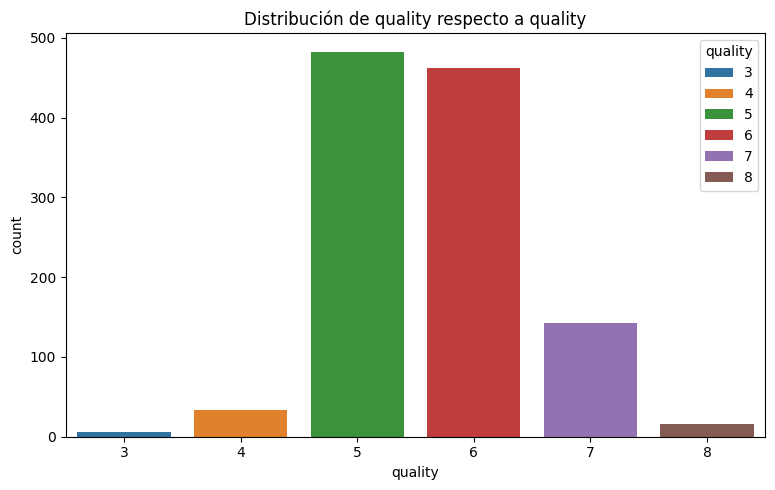

Features categóricos significativos para el plot: ['quality']


In [105]:
significant_cat_features = plot_features_cat_classification(df_wine, target_wine, mi_threshold=0.05, normalize=True)
print("Features categóricos significativos para el plot:", significant_cat_features)

Con iris:

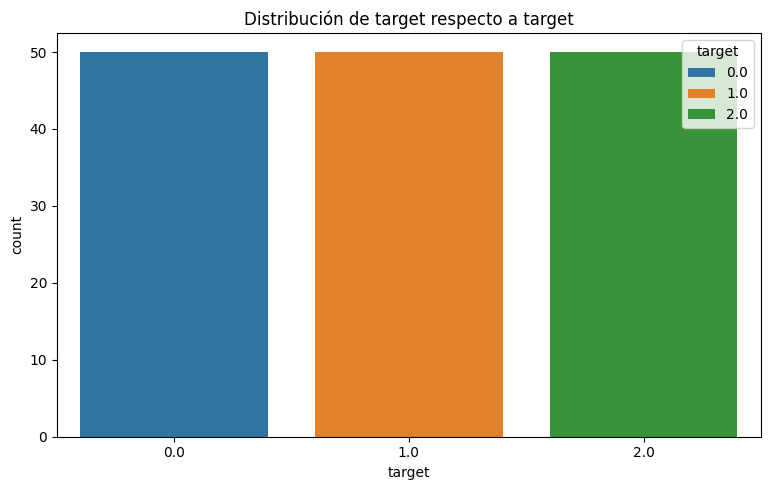

Features categóricos significativos para el plot: ['target']


In [126]:
significant_cat_features = plot_features_cat_classification(df_iris, target_iris, mi_threshold=0.05, normalize=True)
print("Features categóricos significativos para el plot:", significant_cat_features)

Con titanic:

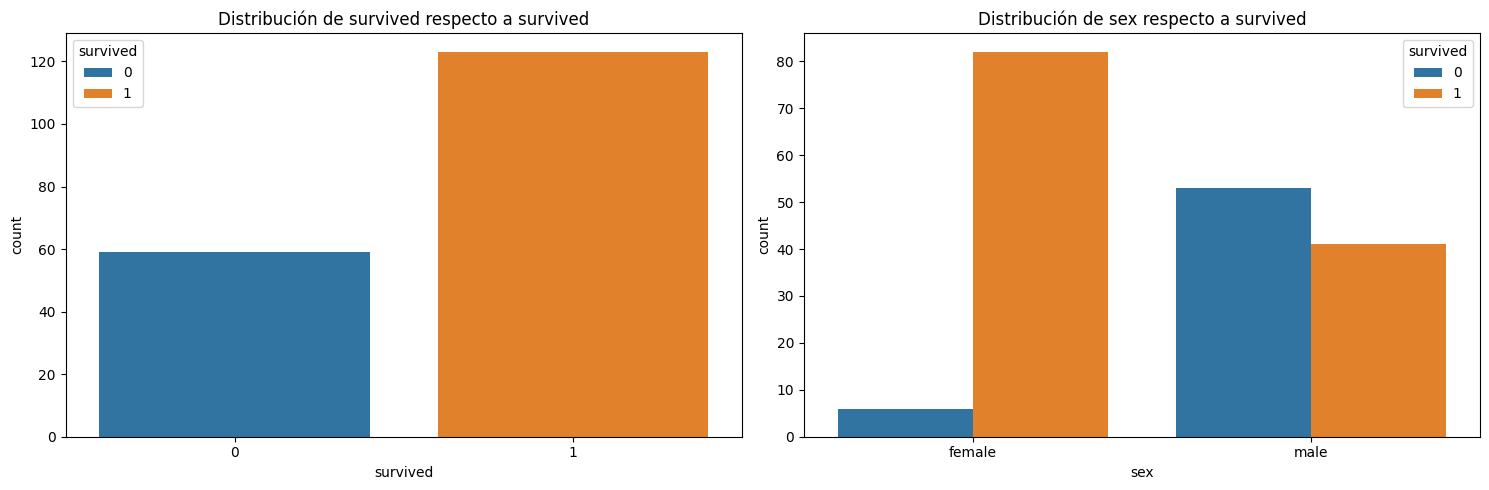

Features categóricos significativos para el plot: ['survived', 'sex']


In [89]:
significant_cat_features = plot_features_cat_classification(titanic, target_titanic, mi_threshold=0.05, normalize=True)
print("Features categóricos significativos para el plot:", significant_cat_features)

$$*$$

## EXTRA:

Junto con las funciones de toolbox_I, la mayoría de las funciones anteriores te servirán para hacer la selección visual e incluso de filtrado. Por eso ahora nos queda la super función siguiente:

### Funcion: super_selector 

Esta función debe recibir como argumento un dataframe de features "dataset", un argumento "target_col" (que puede hacer referencia a una feature numérica o categórica) que puede ser "", un argumento "selectores" de tipo diccionario que puede estar vacío, y un argumento "hard_voting" como una lista vacía. 

CAUSISTICA y funcionamiento:

* Si target_col no está vacío y es un columna válidad del dataframe, la función comprobará el valor de "selectores":
    * Si "selectores" es un diccionario vacío o None:
        La fución devuelve una lista con todas las columnas del dataframe que no sean el target, tengan un valor de cardinalidad diferente del 99.99% (no sean índices) y no tengan un único valor.
    * Si "selectores" no es un diccionario vacío, espera encontrar las siguientes posibles claves (y actúa en consecuencia):  
        "KBest": Tendrá como valor el número de features a seleccionar aplicando un KBest. La función debe crear una lista con las features obtenidas de emplear un SelectKBest con ANOVA.  
        "FromModel": Tendrás como valores una lista con dos elementos, el primero la instancia de un modelo de referencia y el segundo un valor entero o compatible con el argumento "threshold" de SelectFromModel de sklearn. En este caso la función debe crear un a lista con las features obtenidas de aplicar un SelectFromModel con el modelo de referencia, y utilizando "threshold" con el valor del segundo elemento si este no es un entero. En este caso, cuando sea un entero, usarás SelectFromModel con los argumentos "max_features" igual al valor del segundo elemento y "threshold" igual a -np.inf. (Esto hace que se seleccionen "max_features" features)  
        "RFE": Tendrá como valor una tupla con tres elementos. El primero será un modelo instanciado, el segundo elemento determina el número de features a seleccionar y el tercero el step a aplicar. Serán los tres argumentos del RFE de sklearn que usará la función para generar una lista de features.  
        "SFS": Tendrá como valor un tupla con 2 elementos, el modelo de referencia instanciado y el numero de featureas a alcanzar. Esta vez la función empleará un SFS para obtener las lista de features seleccionadas.

* La función debe devolver tantas listas seleccionadas como claves en el diccionario de selectores y una adicional con el resultado de aplicar un hard voting a las listas obtenidas de aplicar el diccionario "selectores" y las que contenga "hard_voting", en caso de que "hard_voting" contenga una o más listas. La función devolverá un diccionario con claves equivalentes a las de selectores pero con la lista correspondiente asignada a cada clave y una adicional "hard_voting" caso de que "hard_voting" como argumento no sea una lista vacía.

Ejemplo:

```python
selectores = {
    "KBest": 5,
    "FromModel": [RandomForestClassifier(),5],
    "RFE": [LogisticRegression(),5,1]
}
super_selector(train_set_titanic, target_col = "Survived", selectores = selectores, hard_voting = ["Pclass","who","embarked_S","fare","age"])

```

Devolvera un diccionario del tipo: 
```python
{
    "KBest": [lista de features obtenidas con un SelectKBest(f_classif, k=5) con fit a train_set_titanic y target_col, sin la target_col en train_set_titanic, claro],
    "FromModel": [lista de features obtenidas de aplicar un SelecFromModel con el RandomForestClassfier y max_features = 5 y threshold = -np.inf],
    "RFE": [lista de features obtenidas de un RFE con argumentos el LogisticRegressor, n_features_to_select = 5, y step = 1],
    "hard_voting": [lista con las len(hard_voting) features con más votos entre las cuatro listas]
}
```
NOTA: Si hard_voting esta a [], la función sigue devolviendo el hard_voting pero sólo con las listas creadas internamente (si hay una sola también), es decir que la función siempre devuelve al menos dos listas.



In [90]:
def super_selector(dataset, target_col="", selectores=None, hard_voting=[]):
    """
    Selecciona características de un DataFrame utilizando diferentes métodos de selección y aplica votación dura.

    Argumentos:
    dataset (pd.DataFrame): DataFrame con las características.
    target_col (str): Nombre de la columna objetivo (target) que puede ser numérica o categórica (por defecto "").
    selectores (dict): Diccionario con los métodos de selección y sus parámetros (por defecto None).
    hard_voting (list): Lista con las características para considerar en la votación dura (por defecto lista vacía).

    Retorna:
    dict: Diccionario con las listas de características seleccionadas por cada método y la votación dura.
    """
    if target_col == "" or target_col not in dataset.columns:
        print(f"La columna target '{target_col}' no es válida o no está en el DataFrame.")
        return None

    if selectores is None or not selectores:
        non_target_cols = [col for col in dataset.columns if col != target_col and dataset[col].nunique() != 1 and dataset[col].nunique() != len(dataset)]
        return {"all_features": non_target_cols}

    result = {}

    X = dataset.drop(columns=[target_col])
    y = dataset[target_col]

    # Convertir todas las variables categóricas a códigos numéricos
    X = X.apply(lambda x: x.astype('category').cat.codes if x.dtype == 'object' or isinstance(x.dtype, pd.CategoricalDtype) else x)

    # Escalar las características numéricas
    scaler = StandardScaler()
    X[X.columns] = scaler.fit_transform(X[X.columns])

    # KBest
    if "KBest" in selectores:
        k = selectores["KBest"]
        selector = SelectKBest(score_func=f_classif, k=k)
        selector.fit(X, y)
        kbest_features = list(X.columns[selector.get_support()])
        result["KBest"] = kbest_features

    # FromModel
    if "FromModel" in selectores:
        model, threshold = selectores["FromModel"]
        if isinstance(threshold, int):
            selector = SelectFromModel(estimator=model, max_features=threshold, threshold=-np.inf)
        else:
            selector = SelectFromModel(estimator=model, threshold=threshold)
        selector.fit(X, y)
        from_model_features = list(X.columns[selector.get_support()])
        result["FromModel"] = from_model_features

    # RFE
    if "RFE" in selectores:
        model, n_features, step = selectores["RFE"]
        model.set_params(max_iter=1000)  # Aumentar el número de iteraciones
        selector = RFE(estimator=model, n_features_to_select=n_features, step=step)
        selector.fit(X, y)
        rfe_features = list(X.columns[selector.get_support()])
        result["RFE"] = rfe_features

    # SFS
    if "SFS" in selectores:
        model, k_features = selectores["SFS"]
        selector = SFS(estimator=model, k_features=k_features, forward=True, floating=False, scoring='accuracy', cv=5)
        selector.fit(X, y)
        sfs_features = list(selector.k_feature_names_)
        result["SFS"] = sfs_features

    all_features = []
    if "KBest" in result:
        all_features.extend(result["KBest"])
    if "FromModel" in result:
        all_features.extend(result["FromModel"])
    if "RFE" in result:
        all_features.extend(result["RFE"])
    if "SFS" in result:
        all_features.extend(result["SFS"])
    all_features.extend(hard_voting)

    feature_counts = pd.Series(all_features).value_counts()
    top_features = feature_counts.index.tolist()

    result["hard_voting"] = top_features

    return result

# Explicación del código:
# Importación de bibliotecas: Se importan las bibliotecas necesarias para la manipulación del DataFrame, selección de características y generación de gráficos.
# Definición de la función super_selector:
# Argumentos:
# dataset: DataFrame que contiene los datos.
# target_col: Columna del DataFrame que se utiliza como objetivo y debe ser categórica o numérica discreta.
# selectores: Diccionario con los métodos de selección y sus parámetros.
# hard_voting: Lista de características para considerar en la votación dura.
# Comprobaciones iniciales:
# Verifica si target_col es válido y existe en el DataFrame.
# Si el diccionario selectores está vacío o es None:
# Devolver todas las columnas excepto el target, índices y columnas con un único valor.
# Inicialización del diccionario de resultados.
# Selección de características utilizando KBest:
# Se aplica SelectKBest con ANOVA y se almacenan las características seleccionadas.
# Selección de características utilizando FromModel:
# Se aplica SelectFromModel con el modelo de referencia y el umbral especificado, almacenando las características seleccionadas.
# Selección de características utilizando RFE:
# Se aplica RFE con el modelo, número de características y paso especificado, almacenando las características seleccionadas.
# Selección de características utilizando SFS:
# Se aplica SFS con el modelo y número de características especificado, almacenando las características seleccionadas.
# Aplicación de Hard Voting:
# Se combinan todas las características seleccionadas de los diferentes métodos y se aplican votos duros para seleccionar las características más frecuentes.
# Retorno de resultados: La función retorna el diccionario de características seleccionadas por cada método y el resultado del hard voting.

Con wine:

In [114]:
selectores = {
    "KBest": 5,
    "FromModel": [RandomForestClassifier(n_estimators=100), 5],
    "RFE": (LogisticRegression(max_iter=1000), 5, 1),
    "SFS": (LogisticRegression(max_iter=1000), 5)
}
result = super_selector(df_wine, target_col=target_wine, selectores=selectores, hard_voting=["alcohol", "malic_acid", "ash", "alcalinity_of_ash", "magnesium"])
print("Resultado del super selector:", result)

Resultado del super selector: {'KBest': ['volatile acidity', 'citric acid', 'total sulfur dioxide', 'sulphates', 'alcohol'], 'FromModel': ['volatile acidity', 'total sulfur dioxide', 'sulphates', 'alcohol', 'Id'], 'RFE': ['volatile acidity', 'total sulfur dioxide', 'density', 'alcohol', 'Id'], 'SFS': ['volatile acidity', 'chlorides', 'total sulfur dioxide', 'sulphates', 'alcohol'], 'hard_voting': ['alcohol', 'volatile acidity', 'total sulfur dioxide', 'sulphates', 'Id']}


Con iris:

In [125]:
selectores = {
    "KBest": 3,
    "FromModel": [RandomForestClassifier(n_estimators=100), 3],
    "RFE": (LogisticRegression(max_iter=1000), 3, 1),
    "SFS": (LogisticRegression(max_iter=1000), 3)
}
result = super_selector(df_iris, target_col=target_iris, selectores=selectores, hard_voting=["sepal_length", "sepal_width", "petal_length", "petal_width"])
print("Resultado del super selector:", result)

Resultado del super selector: {'KBest': ['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'], 'FromModel': ['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'], 'RFE': ['sepal width (cm)', 'petal length (cm)', 'petal width (cm)'], 'SFS': ['sepal width (cm)', 'petal length (cm)', 'petal width (cm)'], 'hard_voting': ['petal length (cm)', 'petal width (cm)', 'sepal length (cm)', 'sepal width (cm)']}


Con Titanic:

In [93]:
selectores = {
    "KBest": 5,
    "FromModel": [RandomForestClassifier(), 5],
    "RFE": (LogisticRegression(max_iter=1000), 5, 1)
}
result = super_selector(titanic, target_col=target_titanic, selectores=selectores, hard_voting=["pclass", "who", "embarked", "fare", "age"])
print("Resultado del super selector:", result)

Resultado del super selector: {'KBest': ['sex', 'age', 'fare', 'who', 'adult_male'], 'FromModel': ['sex', 'age', 'who', 'adult_male', 'alive'], 'RFE': ['sex', 'age', 'who', 'adult_male', 'alive'], 'hard_voting': ['age', 'who', 'sex', 'adult_male', 'fare', 'alive', 'pclass', 'embarked']}


### Consejos para la distribución del trabajo

Tened en cuenta que hay realmente dos trabajos: desarrollo de las funciones, desarrollo del ejemplo.

Diseñad entre todos el ejemplo (puede ser un dataset conocido al que vais a aplicar todas las funciones, en cuyo caso deberías ir saber que debería devolver cada función). Basícamente esto sería diseñar lo que se conocen como "Test" de las funciones.function

Encargad a uno el desarrollo y ejecución del test y el resto repartíos las funciones. A medida que vayáis teniendo las funciones hechas avisad al "testador" para que pueda ir probándolas y dando feedback. El testador mientras las funciones llegan puede diseñar el esqueleto y unas funciones dummies que se llamen igual que las pedidas y que devuelvan siempre un mismo resultado (ojo un resultado válido para lo que se le pide a cada función)

